In [5]:
exec(open("initKeras.py").read())

In [6]:
# #data preparation
inputDir = "F:\\myProjects\\tim209\\filtered by category\\output\\*.npy"
modelDirectory = "F:\\myProjects\\tim209\\doodle\\savedModels\\"
dataUtils = dataUtils( inputDir )

In [7]:
dataUtils.process()

Processing aircraft carrier F:\myProjects\tim209\filtered by category\output\aircraft carrier.npy
Observation #: 20000
label hot vectors #: 20000
Processing airplane F:\myProjects\tim209\filtered by category\output\airplane.npy
Observation #: 20000
label hot vectors #: 20000
Processing alarm clock F:\myProjects\tim209\filtered by category\output\alarm clock.npy
Observation #: 20000
label hot vectors #: 20000
Processing ambulance F:\myProjects\tim209\filtered by category\output\ambulance.npy
Observation #: 20000
label hot vectors #: 20000
Processing angel F:\myProjects\tim209\filtered by category\output\angel.npy
Observation #: 20000
label hot vectors #: 20000
Processing animal migration F:\myProjects\tim209\filtered by category\output\animal migration.npy
Observation #: 20000
label hot vectors #: 20000
Processing ant F:\myProjects\tim209\filtered by category\output\ant.npy
Observation #: 20000
label hot vectors #: 20000
Processing anvil F:\myProjects\tim209\filtered by category\output\

In [8]:
(images, labels, classToLevels ) = dataUtils.getData()
(imagesR, labelsR, classToLevelsR ) = dataUtils.getRandomizedData()
images = dataUtils.reshapeDataForKeras( images )
imagesR = dataUtils.reshapeDataForKeras( imagesR )

(200000, 784) (200000, 10) {'aircraft carrier': 0, 'airplane': 1, 'alarm clock': 2, 'ambulance': 3, 'angel': 4, 'animal migration': 5, 'ant': 6, 'anvil': 7, 'apple': 8, 'arm': 9}


In [9]:

doodleModels = DoodleModels(images, labels)

train X: (160000, 28, 28, 1)
test X: (40000, 28, 28, 1)
train Y: (160000, 10)
test Y: (40000, 10)


In [16]:
firstModel = doodleModels.getModel( 1 )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
flatten_2 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                9248      
__________

In [17]:
epochSize = 10
batchSize = 64
history, testLoss, testAcc = doodleModels.runModel( firstModel, epochSize, batchSize )

Epoch 1/10
160000/160000 [==============================] - 12s 73us/step - loss: 0.7470 - categorical_accuracy: 0.7709
Epoch 2/10
160000/160000 [==============================] - 11s 71us/step - loss: 0.4688 - categorical_accuracy: 0.8609
Epoch 3/10
160000/160000 [==============================] - 11s 71us/step - loss: 0.4066 - categorical_accuracy: 0.8781
Epoch 4/10
160000/160000 [==============================] - 11s 71us/step - loss: 0.3730 - categorical_accuracy: 0.8876
Epoch 5/10
160000/160000 [==============================] - 11s 71us/step - loss: 0.3530 - categorical_accuracy: 0.8930
Epoch 6/10
160000/160000 [==============================] - 11s 70us/step - loss: 0.3396 - categorical_accuracy: 0.8959
Epoch 7/10
160000/160000 [==============================] - 11s 71us/step - loss: 0.3291 - categorical_accuracy: 0.8988
Epoch 8/10
160000/160000 [==============================] - 11s 70us/step - loss: 0.3216 - categorical_accuracy: 0.9007
Epoch 9/10
160000/160000 [==============

In [18]:
print (testLoss, testAcc)

0.36213972403109074 0.890675


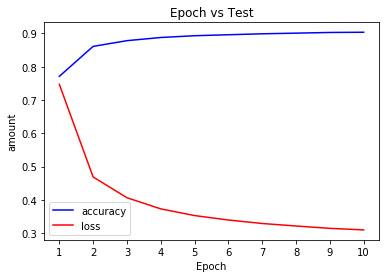

In [20]:
epochX = np.arange(epochSize) + 1
plt.close()
plt.plot( epochX, history.history['categorical_accuracy'], color = "blue", label = "accuracy" )
plt.plot( epochX, history.history['loss'], color = "red", label = "loss" )

plt.title('Epoch vs Test')
plt.xlabel( "Epoch" )
plt.ylabel( "amount" )
plt.xticks( epochX )
plt.legend()

In [21]:
firstModel.save( modelDirectory + "firstModel_e10_b64_Pm.h5" )